# Taking a Deeper Look at the Variables 

## Table of Contents
* [01. Importing Visualization Libraries and Data](#01.-Importing-Visualization-Libraries-and-Data)
* [02. Analyzing Correlations](#02.-Analyzing-Correlations)
* [03. Scatterplots](#03.-Scatterplots)
* [04. Pair Plot](#04.-Pair-Plot)
* [05. Categorical Plots](#05.-Categorical-Plots)
* [06. Bar Charts](#06.-Bar-Charts)
* [07. Exporting Data Frame](#07.-Exporting-Data-Frame)

## 1. Importing Visualization Libraries and Data

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# For code to ignore and not show warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Checking matplotlib version
matplotlib.__version__

'3.7.2'

In [4]:
# Ensuring the charts are displayed in the notebook without needing to refer to them

%matplotlib inline

In [5]:
# Importing clean data 

df = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_clean.pkl')

In [6]:
# Checking for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No mixed data types.

## 02. Analyzing Correlations

In [7]:
# Creating a subset for only numeric columns to analyze correlation 
df_sub = df[['annual_housing_cost', 'annual_food_cost', 'annual_transportation_cost', 'annual_healthcare_cost','annual_other_necessities_cost', 'annual_childcare_cost', 'annual_taxes', 'annual_total_cost', 'median_family_income', 'number_of_dependents']]

In [8]:
# Created correlation matrix for numeric values 
df_sub.corr()

,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,number_of_dependents
annual_housing_cost,1.000000,0.577021,0.253291,0.299124,0.914854,0.644778,0.766607,0.784998,5.848001e-01,4.990672e-01
annual_food_cost,0.577021,1.000000,0.698019,0.814550,0.857673,0.713018,0.474955,0.894176,1.250540e-01,8.767926e-01
annual_transportation_cost,0.253291,0.698019,1.000000,0.689419,0.504562,0.455550,0.299172,0.634592,7.772597e-02,5.420696e-01
annual_healthcare_cost,0.299124,0.814550,0.689419,1.000000,0.591030,0.526584,0.335627,0.748550,-7.098979e-02,7.235577e-01
annual_other_necessities_cost,0.914854,0.857673,0.504562,0.591030,1.000000,0.758449,0.717454,0.936292,4.300152e-01,7.476817e-01
annual_childcare_cost,0.644778,0.713018,0.455550,0.526584,0.758449,1.000000,0.638053,0.880401,2.864036e-01,7.721695e-01
annual_taxes,0.766607,0.474955,0.299172,0.335627,0.717454,0.638053,1.000000,0.749285,5.359746e-01,3.189658e-01
annual_total_cost,0.784998,0.894176,0.634592,0.748550,0.936292,0.880401,0.749285,1.000000,3.371678e-01,8.099121e-01
median_family_income,0.584800,0.125054,0.077726,-0.070990,0.430015,0.286404,0.535975,0.337168,1.000000e+00,3.789957e-17
number_of_dependents,0.499067,0.876793,0.542070,0.723558,0.747682,0.772169,0.318966,0.809912,3.789957e-17,1.000000e+00


In [9]:
# Assigning subset of correlation matrix to a different name 
correlation_matrix = df_sub.corr()

In [10]:
# Converting scientific notation to real numbers
correlation_matrix_real = correlation_matrix.round(6)

In [11]:
# Displaying correlation matrix with real numbers instead of scientific notation
correlation_matrix_real.corr()

,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,number_of_dependents
annual_housing_cost,1.000000,-0.091164,-0.598387,-0.429578,0.746500,0.392786,0.829799,0.372500,0.567391,-0.089618
annual_food_cost,-0.091164,1.000000,0.709353,0.900512,0.594560,0.635142,-0.265735,0.844982,-0.817378,0.954369
annual_transportation_cost,-0.598387,0.709353,1.000000,0.831045,-0.009181,0.137027,-0.565395,0.367908,-0.834593,0.594131
annual_healthcare_cost,-0.429578,0.900512,0.831045,1.000000,0.254844,0.388670,-0.458543,0.633516,-0.940162,0.835330
annual_other_necessities_cost,0.746500,0.594560,-0.009181,0.254844,1.000000,0.741519,0.492431,0.865349,-0.088023,0.565319
annual_childcare_cost,0.392786,0.635142,0.137027,0.388670,0.741519,1.000000,0.300171,0.877754,-0.338488,0.728328
annual_taxes,0.829799,-0.265735,-0.565395,-0.458543,0.492431,0.300171,1.000000,0.258599,0.583641,-0.312707
annual_total_cost,0.372500,0.844982,0.367908,0.633516,0.865349,0.877754,0.258599,1.000000,-0.499763,0.818232
median_family_income,0.567391,-0.817378,-0.834593,-0.940162,-0.088023,-0.338488,0.583641,-0.499763,1.000000,-0.810794
number_of_dependents,-0.089618,0.954369,0.594131,0.835330,0.565319,0.728328,-0.312707,0.818232,-0.810794,1.000000


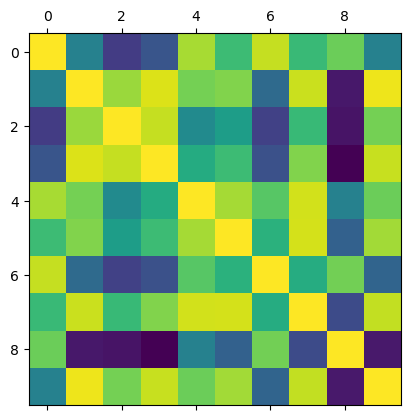

In [12]:
# Create a correlation heatmap using matplotlib

bar1 = plt.matshow(correlation_matrix_real.corr())
plt.show()

In [13]:
# Export bar chart as image file
bar1.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/unlabeledcorrelationmatrix.png', bbox_inches='tight')

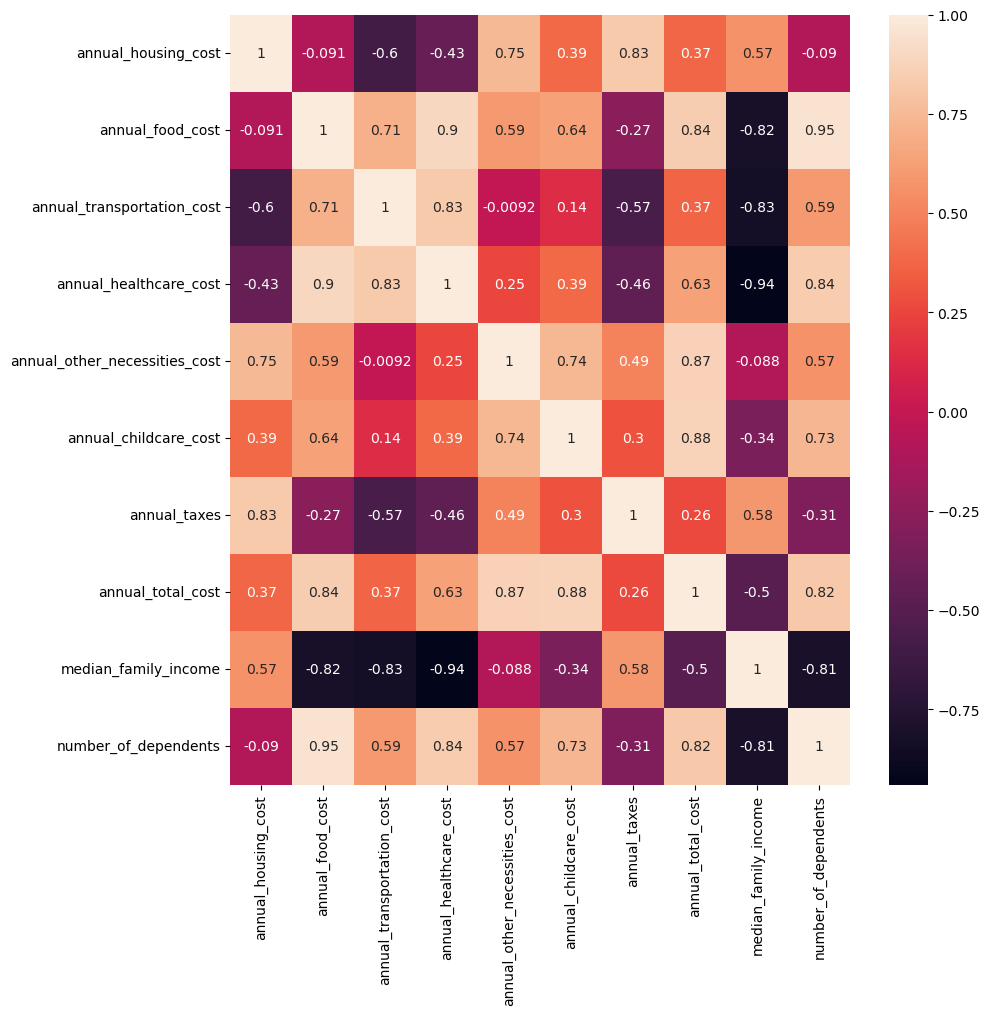

In [14]:
# Create a subplot with matplotlib and then create heatmap with seaborn
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(correlation_matrix_real.corr(), annot = True, ax = ax) 

#Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

These were the strongest correlations.
The * indicates I explored these variables further. 

1) annual housing cost and annual transportation cost (strong negative relationship) 
* 2) annual housing cost and annual other necessities cost have a strong positive relationship (as housing costs increase, other necessity costs increase, vice versa) 
3) annual housing cost and annual taxes have a strong positive relationship (the higher the housing cost, the more taxes paid)
4) annual food cost and annual transportation cost (positive)
5) annual food cost and annual healthcare cost (positive)
* 6) annual food cost and annual total cost (positive)
7) annual food cost and median family income (negative)
* 8) annual food cost and number of dependents (positive, as dependents increase, food cost increases)(better visualized with BAR graph)
9) annual transportation and annual healthcare (positive)
10) annual transportation and median family income (negative)
11) annual healthcare and median family income (negative)
* 12) annual healthcare and number of dependents (positive, as dependents icnrease, healthcare cost increases)(BAR graph)
13) annual other necessities and annual childcare (positive)
14) annual other necessities and annual total cost (positive)
* 15) annual childcare and annual total cost (positive, as childcare increases, total cost increases so childcare plays a big roll in overall cost)
* 16) annual childcare and number of dependents (positive, as dependents increase, childcare cost increases)(BAR graph) 
* 17) annual total cost and number of dependents (positive, as dependents increase, total cost increases)(BAR graph) 
* 18) median family income and number of dependents (negative, as dependents increase, median family income decreases)(BAR graph) 

In [15]:
# Export bar chart as image file
corr.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/heatmap.png', bbox_inches='tight')

# 03. Scatterplots

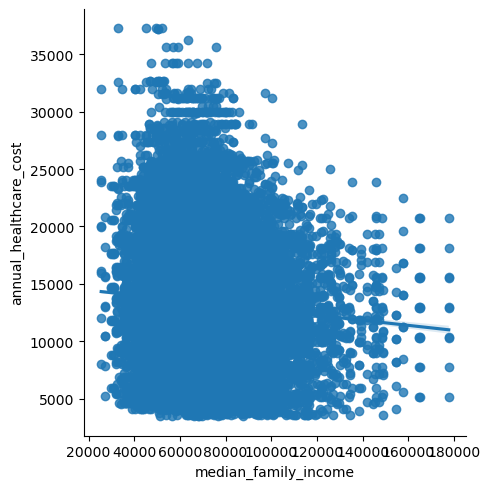

In [16]:
# Create a scatterplot for annual healthcare cost and median family income
bar2 = sns.lmplot(x = 'median_family_income', y = 'annual_healthcare_cost', data = df_sub)

As median family income increases, annual healthcare cost decreases.
Could be because they may have access to higher-quality healthcare services like preventative care which could lead to lower healthcare costs.
Could also be that they are able to afford healthier lifestyle choices which could also lower healthcare costs. 

In [17]:
# Export bar chart as image file
bar2.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/healthcareincome.png', bbox_inches='tight')

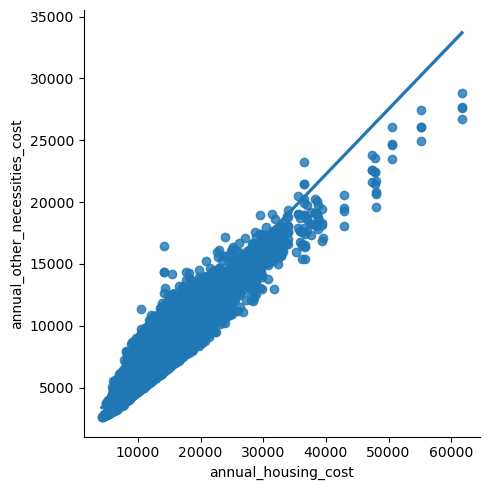

In [18]:
# Create a scatterplot for annual housing cost and annual other necessities cost 

bar3 = sns.lmplot(x = 'annual_housing_cost', y = 'annual_other_necessities_cost', data = df_sub)

as housing cost increases, the cost of other necessities increase as well. spending more on housing equates to spending more on other necessities. the utilities and other things are more expensive in a housing situation that is more expensive. 

In [19]:
# Export bar chart as image file
bar3.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/housingnecessitiesscatter.png', bbox_inches='tight')

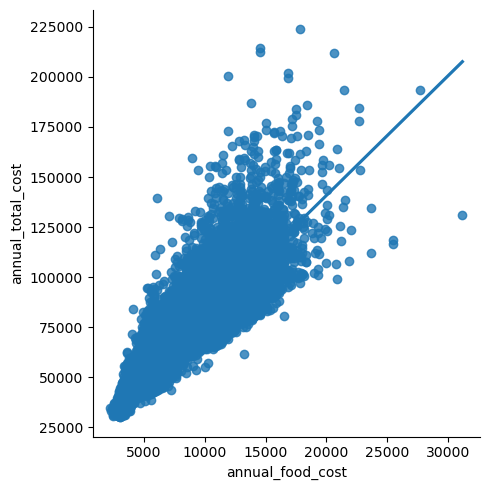

In [20]:
# Create a scatterplot for annual food cost and annual total cost 
bar4 = sns.lmplot(x = 'annual_food_cost', y = 'annual_total_cost', data = df_sub)

the more the family spent on food, the more their total amount spent was. food seems to play a big role in a families total cost. 

In [21]:
# Export bar chart as image file
bar4.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/foodtotalscatter.png', bbox_inches='tight')

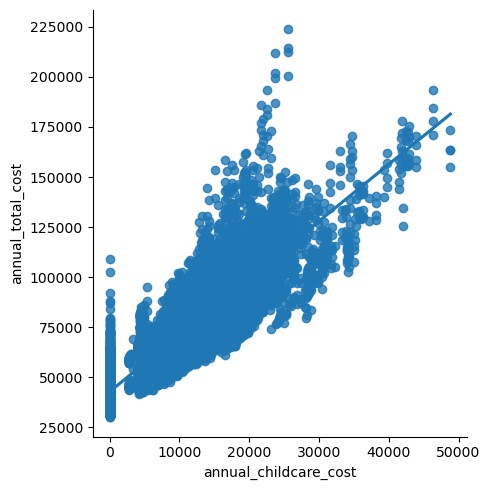

In [22]:
# Create a scatterplot for annual childcare and annual total cost 

bar5 = sns.lmplot(x = 'annual_childcare_cost', y = 'annual_total_cost', data = df_sub)

as childcare cost increases, total cost increases which makes sense. so we can assume that the more dependents, the more childcare cost, the greater the total cost. the foundation of spending this money is dependents/children. 

In [23]:
# Export bar chart as image file
bar5.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/childcaretotalscatter.png', bbox_inches='tight')

# 04. Pair Plot

In [24]:
# Keep only the variables you want to use in the pair plot

df_sub2 = df_sub[['annual_housing_cost', 'annual_food_cost', 'number_of_dependents', 'annual_total_cost', 'annual_childcare_cost', 'median_family_income', 'annual_other_necessities_cost', 'annual_healthcare_cost']]

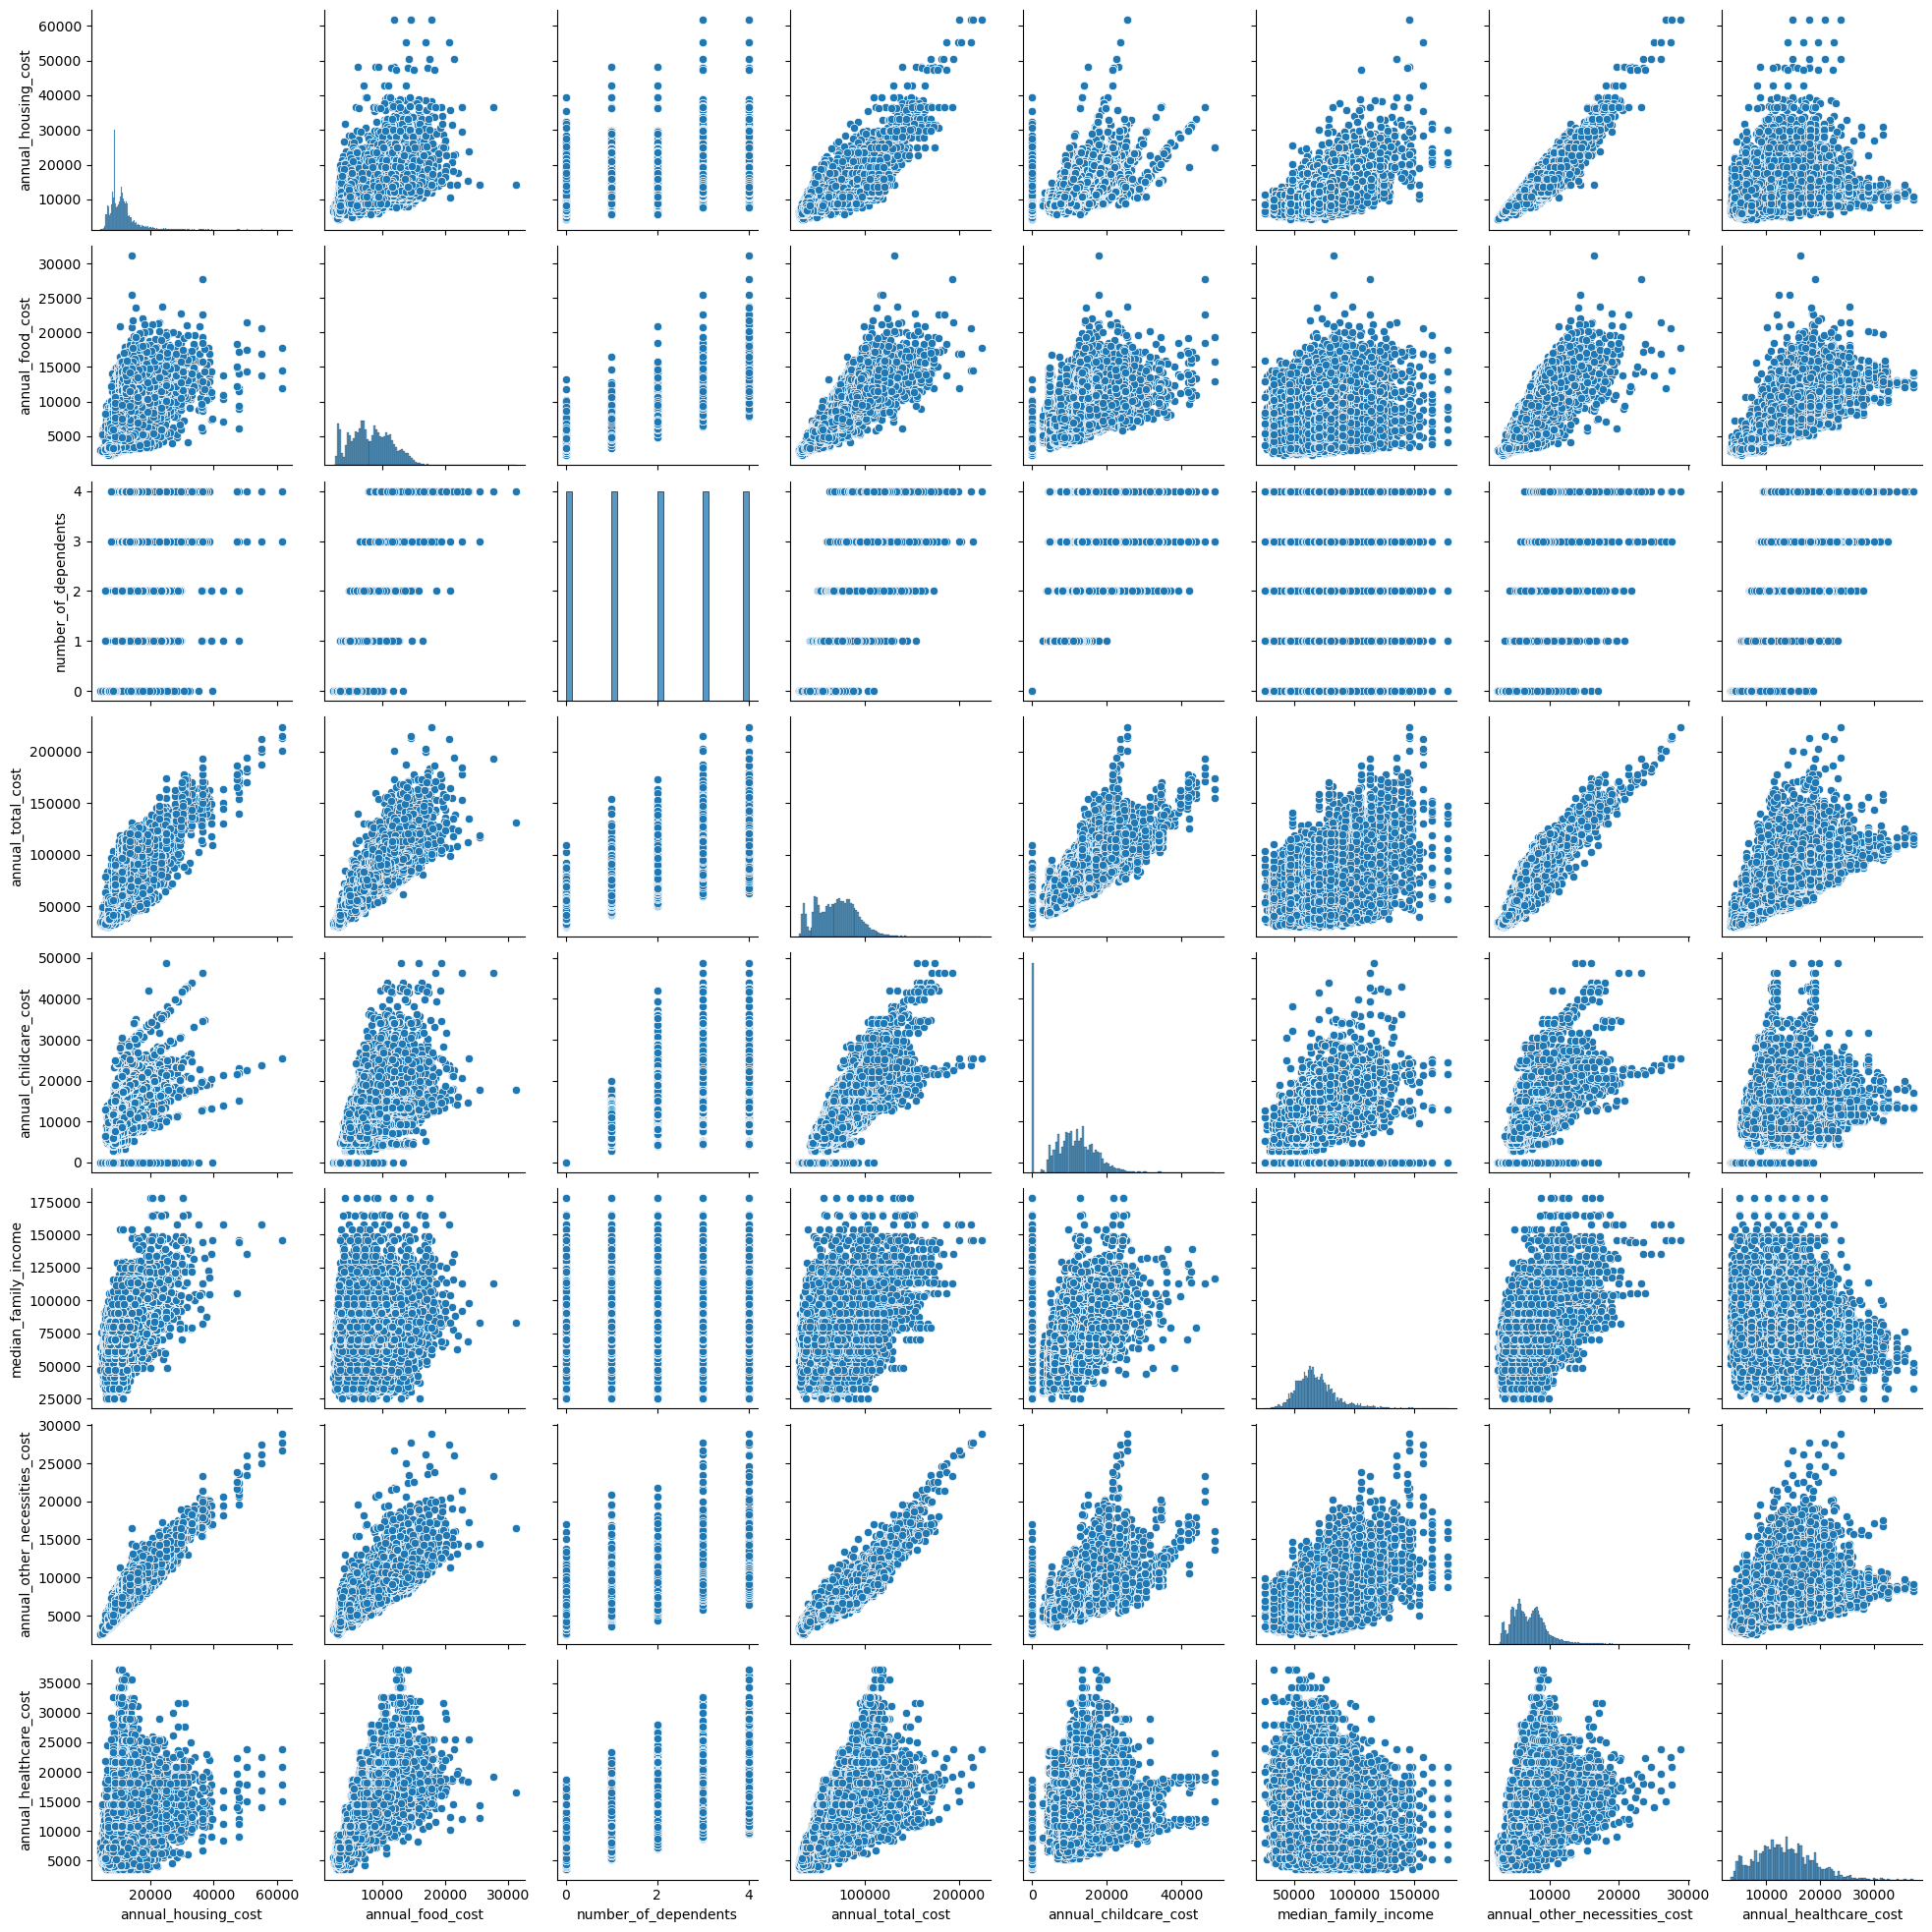

In [25]:
# Create a pair plot 

g = sns.pairplot(df_sub2)

##Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

Further explore (by utilization of bar graphs): 
1) number of dependents and annual food cost
2) number of dependents and annual healthcare
3) number of dependents and annual childcare
4) number of dependents and annual total cost

these variables all have very strong positive relationships. i want to further investigate how the number of children/dependents you have affects costs. 

In addition, I am going to further explore: 
1) annual housing cost and annual other necessities cost
2) annual total cost and annual other necessities cost 
3) annual healthcare cost and median family income

these both have very strong linear relationships 

In [26]:
# Export bar chart as image file
g.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/pairplot.png', bbox_inches='tight')

# 05. Categorical Plots

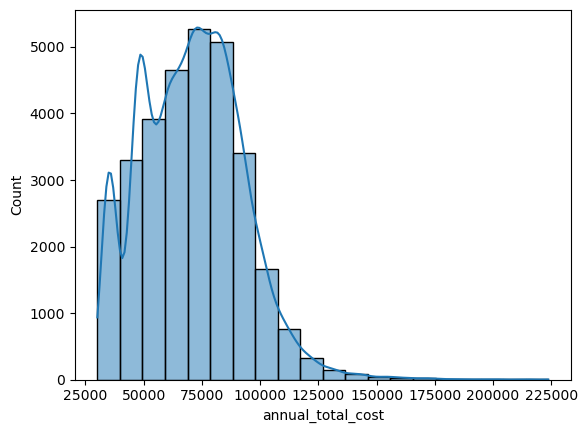

In [27]:
# Creating categorical plot for annual total cost to visualize distribution

bar6 = sns.histplot(df['annual_total_cost'], bins = 20, kde = True)

majority of families spend anywhere from 30,000 to 90,0000 per year. anything past 90,000 is not as common. 

In [28]:
# Export bar chart as image file
bar6.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/totalcosthist.png', bbox_inches='tight')

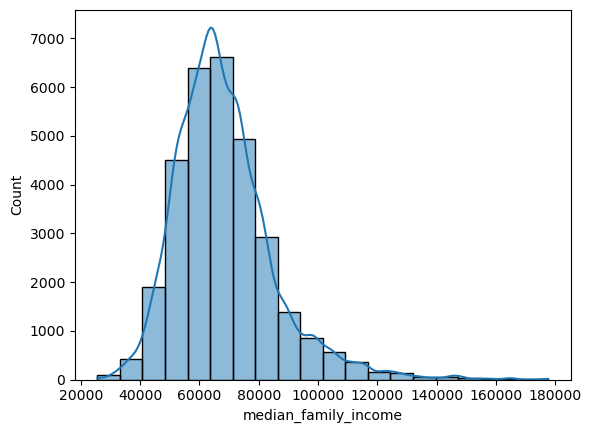

In [29]:
# Creating categorical plot for median family income to visualize distribution

bar7 = sns.histplot(df['median_family_income'], bins = 20, kde = True)

most families make between 50,000 and 85,000. anything below 50,000 is considered low and anything above 85,000 is considered high. although, not many people make below 50,000 or above 85,000. so, most families seem to be middle class. 

In [30]:
# Export bar chart as image file
bar7.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/medianincomehist.png', bbox_inches='tight')

In [31]:
# Creating an "income level" column and assigning catgeories based on income criteria 
df.loc[df['median_family_income'] < 50000, 'Income Level'] = 'Low Income'
df.loc[(df['median_family_income'] > 50000) & (df['median_family_income'] < 85000), 'Income Level'] = 'Average Income'
df.loc[df['median_family_income'] >= 85000, 'Income Level'] = 'High Income'

In [32]:
# Checking values of Income Level column
df['Income Level'].value_counts(dropna = False)

Income Level
Average Income    24490
High Income        3950
Low Income         2980
nan                  10
Name: count, dtype: int64

In [33]:
# Checking that the income level column was added
df.columns

Index(['case_id', 'state', 'metropolitan_area', 'county',
       'family_member_count', 'annual_housing_cost', 'annual_food_cost',
       'annual_transportation_cost', 'annual_healthcare_cost',
       'annual_other_necessities_cost', 'annual_childcare_cost',
       'annual_taxes', 'annual_total_cost', 'median_family_income',
       'parent_status', 'number_of_dependents', 'Income Level'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

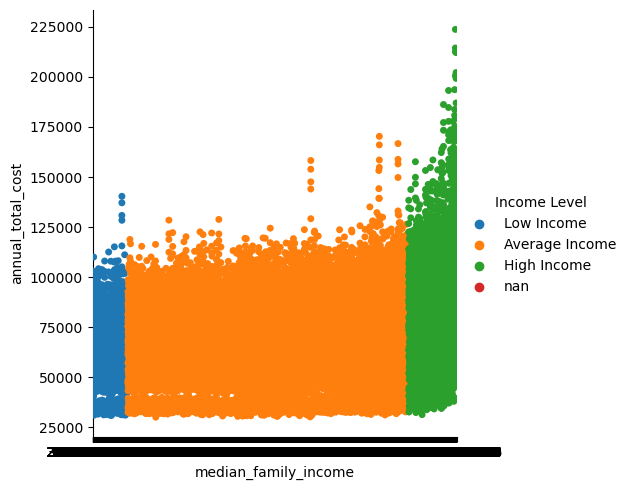

In [34]:
# Create a categorical plot in seaborn using the Income Level categories 

plt.figure(figsize=(10, 6))
g2 = sns.catplot(x="median_family_income", y="annual_total_cost", hue="Income Level", data=df)
plt.show()

Those with higher income tend to spend more annually than those with low and average income. 

In [35]:
# Export bar chart as image file
g2.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/incomecatplot.png', bbox_inches='tight')

# 06. Bar Charts

In [36]:
# Checking count of each income level group and removing nan values 
income_counts = df['Income Level'].dropna().value_counts()
income_counts = income_counts[income_counts.index != 'nan']

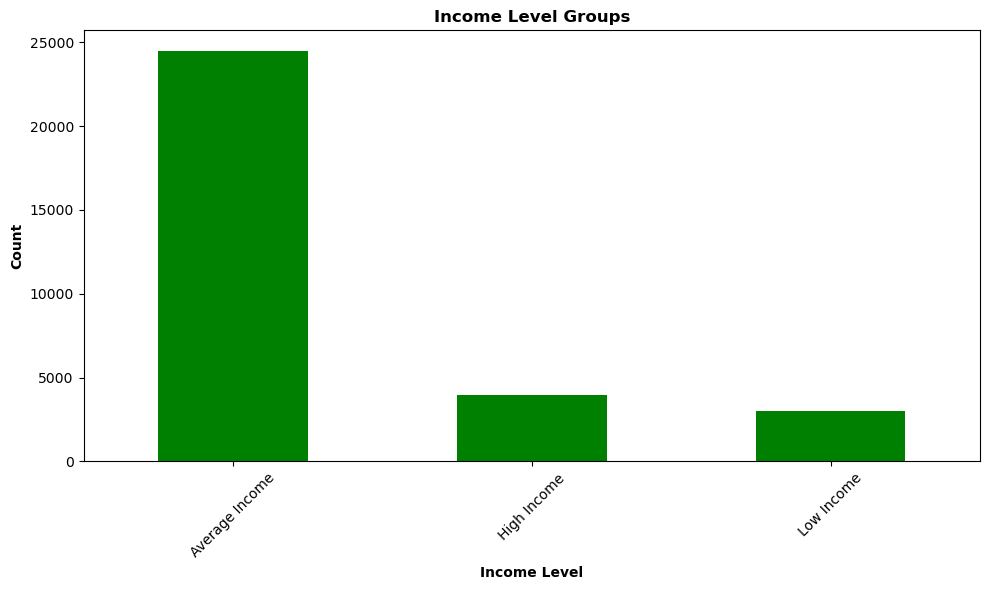

In [37]:
# Creating bar chart for income level column 
plt.figure(figsize=(10, 6))
bar8 = income_counts.plot(kind='bar', color='green')
plt.title('Income Level Groups', fontweight='bold')
plt.xlabel('Income Level', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There are more people who are average income when compared to high and low income individuals.

In [38]:
# Export bar chart as image file
bar8.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/incomelevel.png', bbox_inches='tight')

Analyzing metro areas and number of dependents in regard to expenses now. 

<Figure size 1000x600 with 0 Axes>

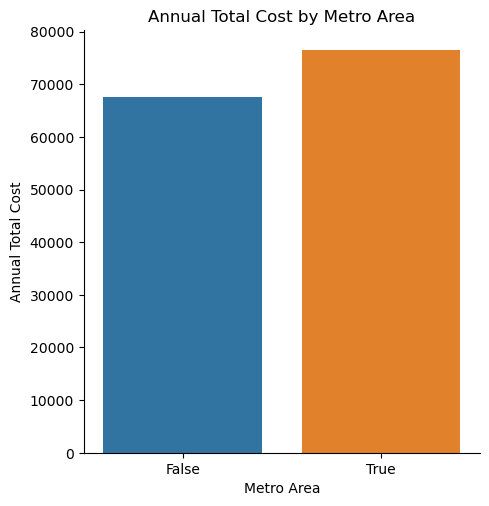

In [39]:
# Creating bar plot for number of dependents and annual total cost 
plt.figure(figsize=(10, 6))
bar9 = sns.catplot(x="metropolitan_area", y="annual_total_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Total Cost by Metro Area')
plt.xlabel('Metro Area')
plt.ylabel('Annual Total Cost')
plt.show()

metro areas have a higher cost of living than non-metro areas.

In [40]:
# Export bar chart as image file
bar9.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/metrocost.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

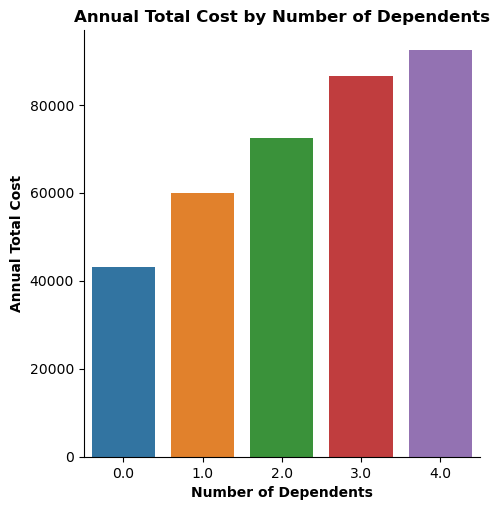

In [41]:
# Creating bar plot for number of dependents and annual total cost 
plt.figure(figsize=(10, 6))
bar10 = sns.catplot(x="number_of_dependents", y="annual_total_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Total Cost by Number of Dependents', fontweight = 'bold')
plt.xlabel('Number of Dependents', fontweight = 'bold')
plt.ylabel('Annual Total Cost', fontweight = 'bold')
plt.show()

a families annual total cost increases with the more dependents/children they have. 

In [42]:
# Export bar chart as image file
bar10.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/dependenttotalbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

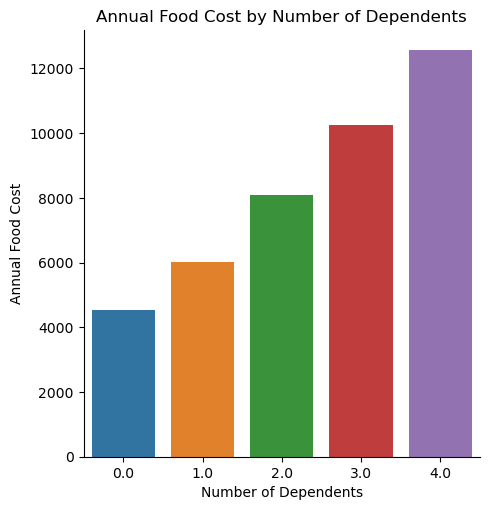

In [43]:
# Creating plot for number of dependents and annual food cost 
plt.figure(figsize=(10, 6))
bar11 = sns.catplot(x="number_of_dependents", y="annual_food_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Food Cost by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Annual Food Cost')
plt.show()

The more the children/dependents, the higher the food cost yearly.

In [44]:
# Export bar chart as image file
bar11.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/dependentfoodbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

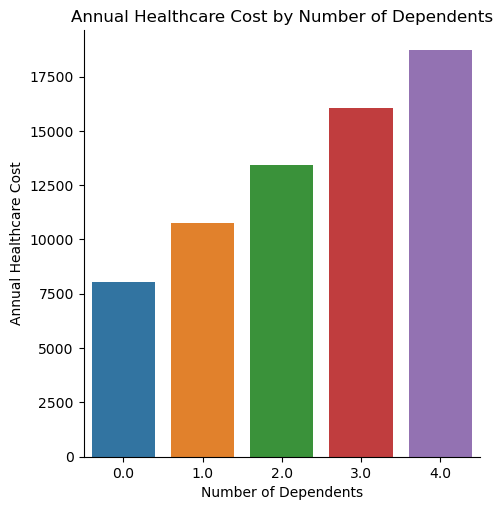

In [45]:
# Creating plot for number of dependents and healthcare cost 
plt.figure(figsize=(10, 6))
bar12 = sns.catplot(x="number_of_dependents", y="annual_healthcare_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Healthcare Cost by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Annual Healthcare Cost')
plt.show()

The more dependents/children, the greater the healthcare costs in the home. 

In [46]:
# Export bar chart as image file
bar12.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/dependenthealthbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

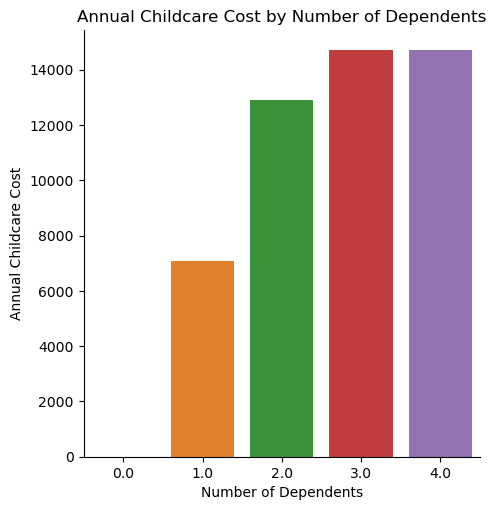

In [47]:
# Creating categorical plot for number of dependents and annual childcare cost 
plt.figure(figsize=(10, 6))
bar13 = sns.catplot(x="number_of_dependents", y="annual_childcare_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Childcare Cost by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Annual Childcare Cost')
plt.show()

The childcare costs are more expensive when you have 3 or 4 dependents, but 3 & 4 dependents have similar childcare costs. 

We will now take a look at how parent status (a categorical variable) impacts expenses. 

In [48]:
# Export bar chart as image file
bar13.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/dependentchildbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

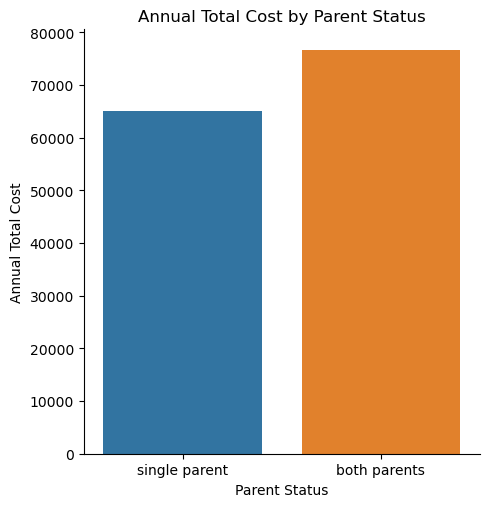

In [49]:
# Creating categorical plot for parent status and annual total cost 
plt.figure(figsize=(10, 6))
bar14 = sns.catplot(x="parent_status", y="annual_total_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Total Cost by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Annual Total Cost')
plt.show()

a 2 parent household is shown to spend more overall annually than a single parent household.

In [50]:
# Export bar chart as image file
bar14.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/parenttotalbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

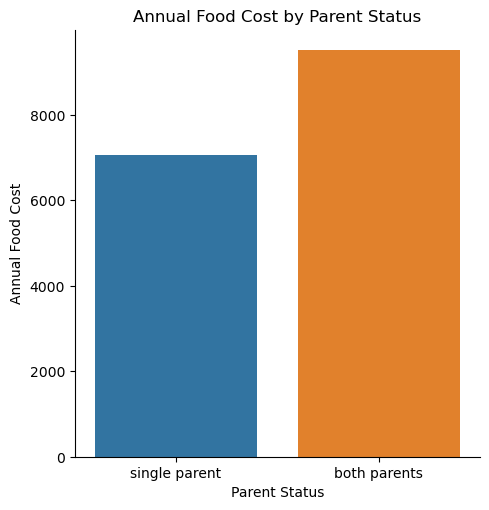

In [51]:
# Creating categorical plot for parent status and annual food cost 
plt.figure(figsize=(10, 6))
bar15 = sns.catplot(x="parent_status", y="annual_food_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Food Cost by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Annual Food Cost')
plt.show()

a 2 parent household spends more on food annually.

In [52]:
# Export bar chart as image file
bar15.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/parentfoodbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

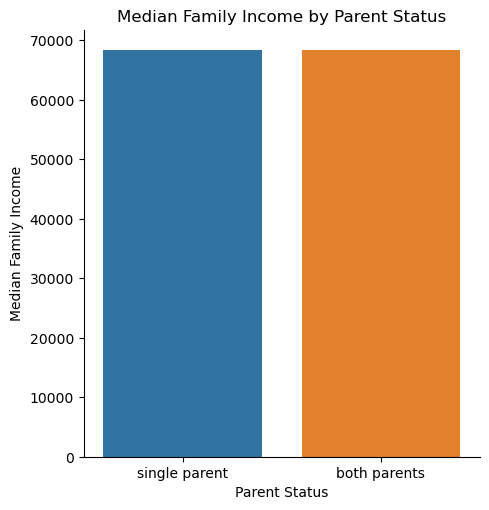

In [53]:
# Creating categorical plot for parent status and median family income
plt.figure(figsize=(10, 6))
bar16 = sns.catplot(x="parent_status", y="median_family_income", data=df, kind="bar", errorbar=None)
plt.title('Median Family Income by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Median Family Income')
plt.show()

single parent and 2 parent households have similar incomes. 

In [54]:
# Export bar chart as image file
bar16.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/parentincomebar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

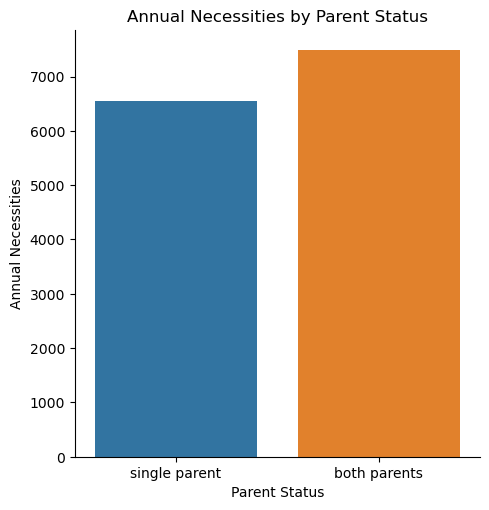

In [55]:
# Creating categorical plot for parent status and other necessities 
plt.figure(figsize=(10, 6))
bar17 = sns.catplot(x="parent_status", y="annual_other_necessities_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Necessities by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Annual Necessities')
plt.show()

2 parent households spend more money on other necessities than single parents.

In [56]:
# Export bar chart as image file
bar17.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/parentnecessitiesbar.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

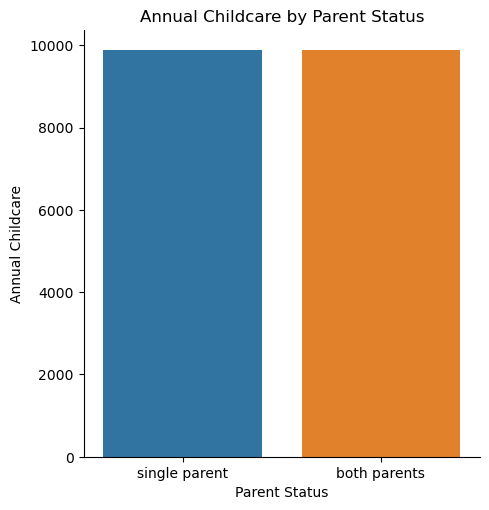

In [57]:
# Creating categorical plot for parent status and childcare 
plt.figure(figsize=(10, 6))
bar18 = sns.catplot(x="parent_status", y="annual_childcare_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Childcare by Parent Status')
plt.xlabel('Parent Status')
plt.ylabel('Annual Childcare')
plt.show()

Both parent statuses spend the same amount on childcare. 

Now I will analyze states and counties in regard to expenses. 

In [58]:
# Export bar chart as image file
bar18.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/parentchildcarebar.png', bbox_inches='tight')

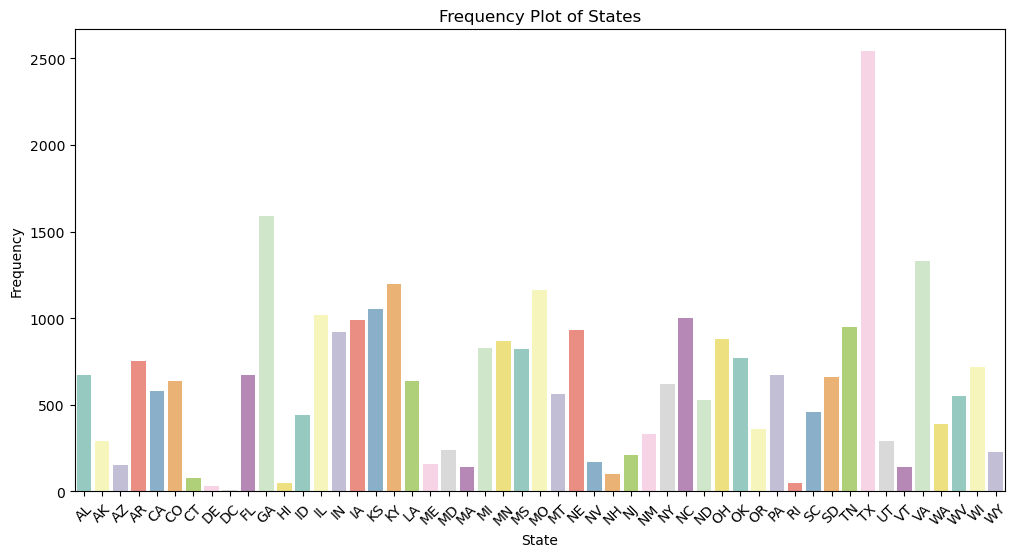

In [59]:
# Creating frequency plot for state column
plt.figure(figsize=(12, 6))
bar19 = sns.countplot(x="state", data=df, palette="Set3")
plt.title('Frequency Plot of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We can see that each state is mentioned in the data set a different number of times. So, when we calulate measures in regard to state, we must take averages to provide an accurate representation. For example, because Texas is mentioned the most, it will have a higher total annual cost than any other state if we were to just take an aggregate, as shown below. 

In [60]:
# Export bar chart as image file
bar19.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statefrequencyplot.png', bbox_inches='tight')

In [61]:
# Grouping state and annual total cost by sum
state_total_cost = df.groupby('state')['annual_total_cost'].sum().reset_index()

In [62]:
# Sorting the variables by descending order
state_total_cost_sorted = state_total_cost.sort_values(by='annual_total_cost', ascending=False)

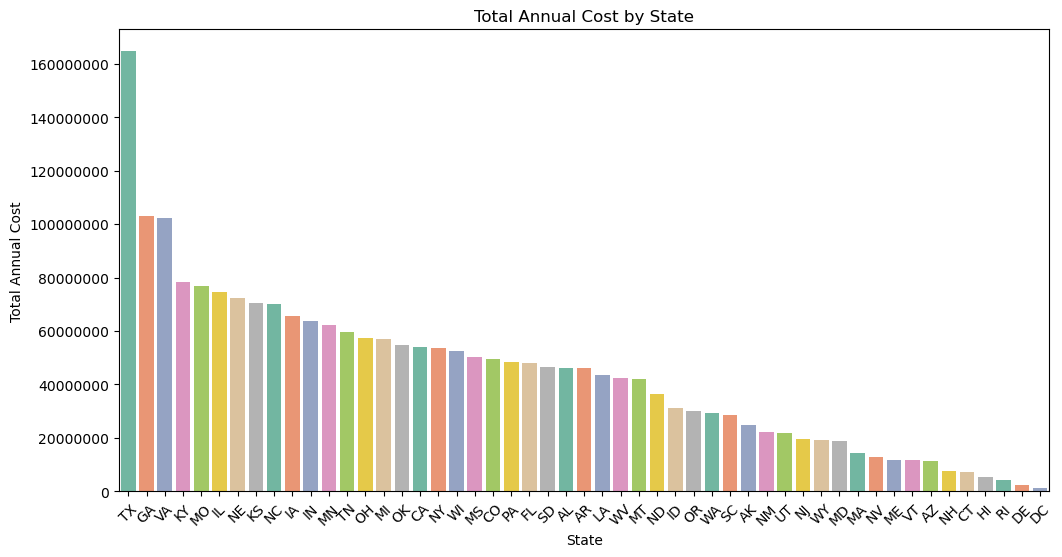

In [63]:
# Plotting the aggregation of variables 
plt.figure(figsize=(12, 6))
bar20 = sns.barplot(x="state", y="annual_total_cost", data=state_total_cost_sorted, palette="Set2")
plt.title('Total Annual Cost by State')
plt.xlabel('State') 
plt.ylabel('Total Annual Cost')
plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

This is an inaccurate representation of annual total cost amongst different states. 

In [64]:
# Export bar chart as image file
bar20.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statetotalbar.png', bbox_inches='tight')

In [65]:
# Grouping state and annual total cost by mean 
state_avg_cost = df.groupby('state')['annual_total_cost'].mean().reset_index()

In [66]:
# Sorting the variables 
state_avg_cost_sorted = state_avg_cost.sort_values(by='annual_total_cost', ascending=False)

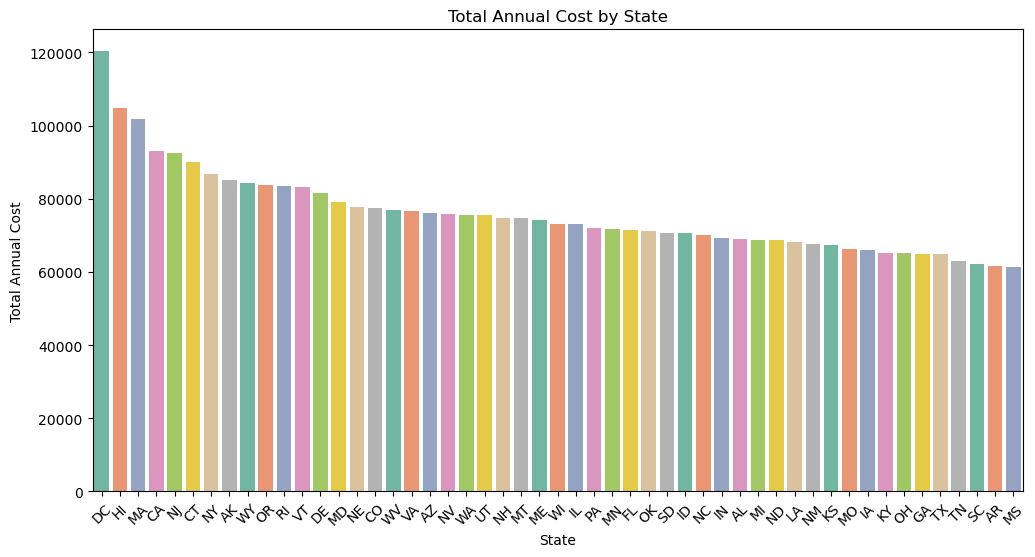

In [67]:
# Plotting the values to show average of each state in regard to annual total cost 
plt.figure(figsize=(12, 6))
bar21 = sns.barplot(x="state", y="annual_total_cost", data=state_avg_cost_sorted, palette="Set2")
plt.title('Total Annual Cost by State')
plt.xlabel('State')
plt.ylabel('Total Annual Cost')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  
plt.show()

Top 15 states in regard to total annual cost:
DC, HI, MA, CA, NJ, CT, NY, AK, WY, OR, RI, VT, DE, MD, NE 

Bottom 15 states in regard to total annual cost:
MI, ND, LA, NM, KS, MO, IA, KY, OH, GA, TX, TN, SC, AR, MS

In [68]:
# Export bar chart as image file
bar21.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statetotalbar2.png', bbox_inches='tight')

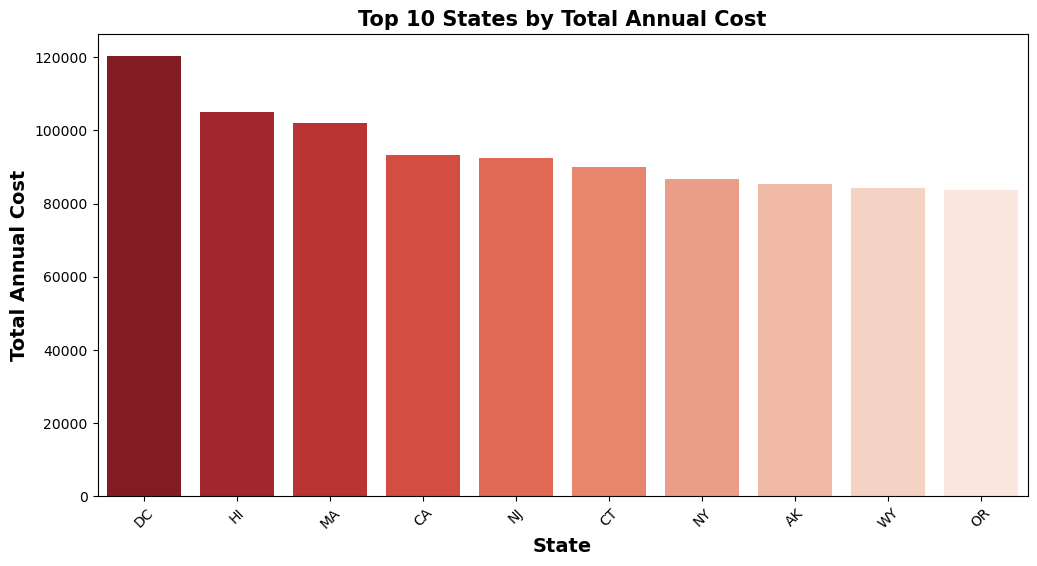

In [69]:
# Top 10 states total cost 
plt.figure(figsize=(12, 6))
top_10_states = state_avg_cost_sorted.head(10)
reds_palette = sns.color_palette("Reds", n_colors=10)
descending_reds_palette = reds_palette[::-1]
bar22 = sns.barplot(x="state", y="annual_total_cost", data=top_10_states, palette=descending_reds_palette)
plt.title('Top 10 States by Total Annual Cost', fontweight='bold', fontsize=15)
plt.xlabel('State', fontweight='bold', fontsize=14)
plt.ylabel('Total Annual Cost', fontweight='bold', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  
plt.show()

In [70]:
bar22.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statetotalbartop10.png', bbox_inches='tight')

In [71]:
# Grouping state and annual food cost by mean 
state_avg_food_cost = df.groupby('state')['annual_food_cost'].mean().reset_index()

In [72]:
# Sorting the variables 
state_avg_food_cost_sorted = state_avg_food_cost.sort_values(by='annual_food_cost', ascending=False)

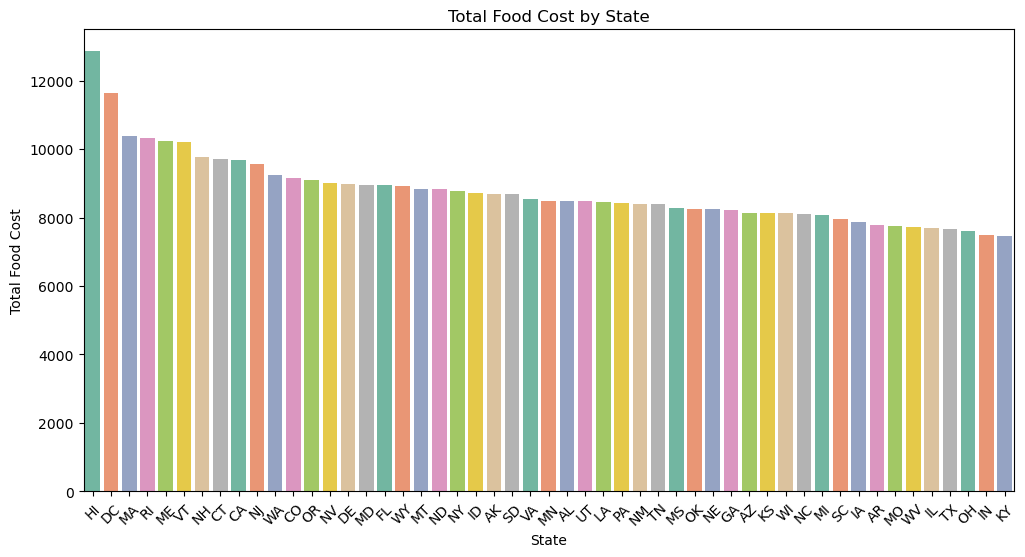

In [73]:
# Plotting the values to show average of each state in regard to annual total cost 
plt.figure(figsize=(12, 6))
bar23 = sns.barplot(x="state", y="annual_food_cost", data=state_avg_food_cost_sorted, palette="Set2")
plt.title('Total Food Cost by State')
plt.xlabel('State')
plt.ylabel('Total Food Cost')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  
plt.show()

Top 15 states in regard to annual food cost:  HI, DC, MA, CA, RI, ME, VT, NH, CT, CA, NJ, WA, CO, OR, NV

Bottom 15 states in regard to annual food cost: AZ, KS, WI, NC, MI, SC, IA, AR, MO, WV, IL, TX, OH, IN, KY

In [74]:
# Export bar chart as image file
bar23.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statefoodbar.png', bbox_inches='tight')

In [75]:
# Grouping state and annual food cost by mean 
state_avg_trans_cost = df.groupby('state')['annual_transportation_cost'].mean().reset_index()

In [76]:
# Sorting the variables 
state_avg_trans_cost_sorted = state_avg_trans_cost.sort_values(by='annual_transportation_cost', ascending=False)

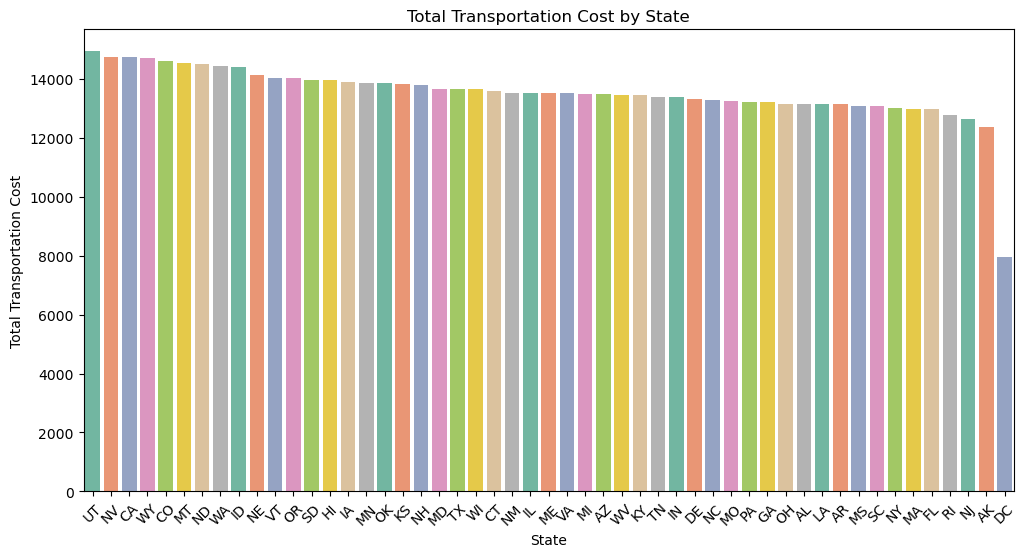

In [77]:
# Plotting the values to show average of each state in regard to annual total cost 
plt.figure(figsize=(12, 6))
bar24 = sns.barplot(x="state", y="annual_transportation_cost", data=state_avg_trans_cost_sorted, palette="Set2")
plt.title('Total Transportation Cost by State')
plt.xlabel('State')
plt.ylabel('Total Transportation Cost')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)  
plt.show()

Top 15 states in regard to transportation: UT, NV, CA, WY, CO, MT, ND, WA, ID, NE, VT, OR, SD, HI, IA

Bottom 15 states in regard to transportation: PA, GA, OH, AL, LA, AR, MS, SC, NY, MA, FL, RI, NJ, AK, DC

In [78]:
# Export bar chart as image file
bar24.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/statetransbar.png', bbox_inches='tight')

In [79]:
# Grouping state/county and annual total cost by sum 
county_total_cost = df.groupby(['state', 'county'])['annual_total_cost'].sum().reset_index()

In [80]:
# Sorting the variables and only including the top 15 
top_10_counties = county_total_cost.nlargest(10, 'annual_total_cost')

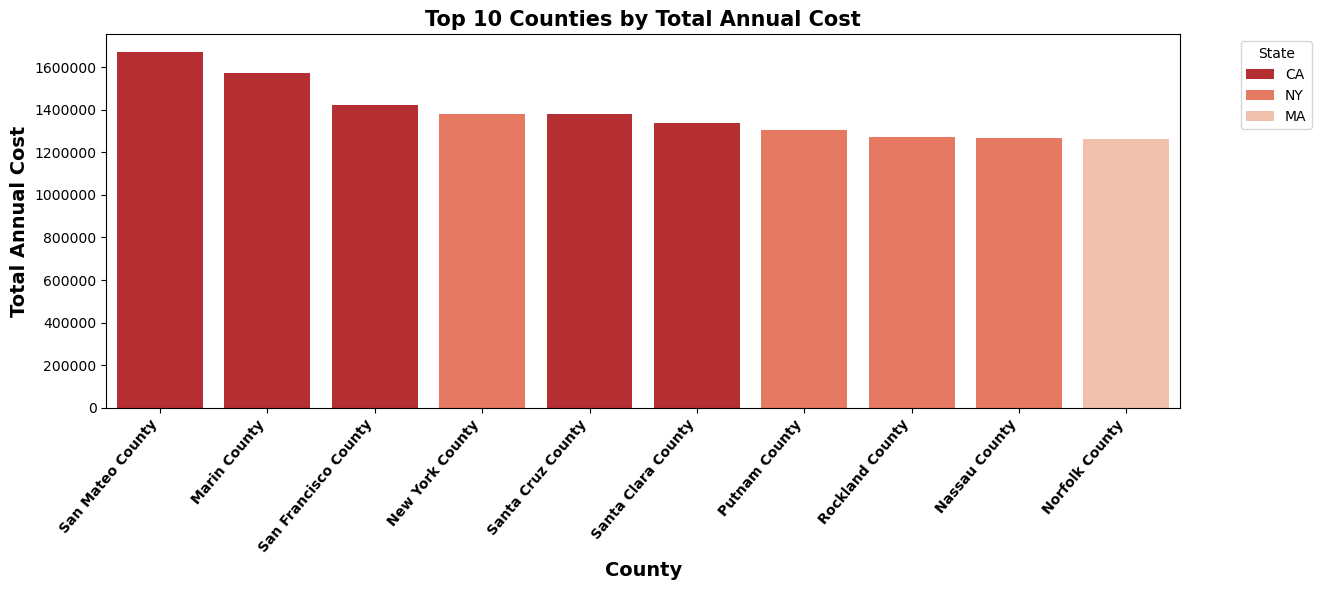

In [81]:
# Plotting bar graph to show top 15 counties in regard to total annual cost
plt.figure(figsize=(12, 6))
bar25 = sns.barplot(x="county", y="annual_total_cost", hue="state", data=top_10_counties, palette="Reds_r", dodge=False)
plt.title('Top 10 Counties by Total Annual Cost', fontweight = 'bold', fontsize=15)
plt.xlabel('County',fontsize=14, fontweight = 'bold')
plt.ylabel('Total Annual Cost', fontsize=14, fontweight = 'bold')
plt.xticks(rotation=50, ha='right', fontsize=10, fontweight = 'bold') 
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()  
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Highest total annual cost counties are in CA, NY, MA, and DC.

In [82]:
# Export bar chart as image file
bar25.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/countytotalbar.png', bbox_inches='tight')

In [83]:
# Grouping state/county and annual total cost by sum 
county_total_cost2 = df.groupby(['state', 'county'])['annual_total_cost'].sum().reset_index()

In [84]:
# Sorting the variables and only including the bottom 15 
bottom_15_counties = county_total_cost2.nsmallest(15, 'annual_total_cost')

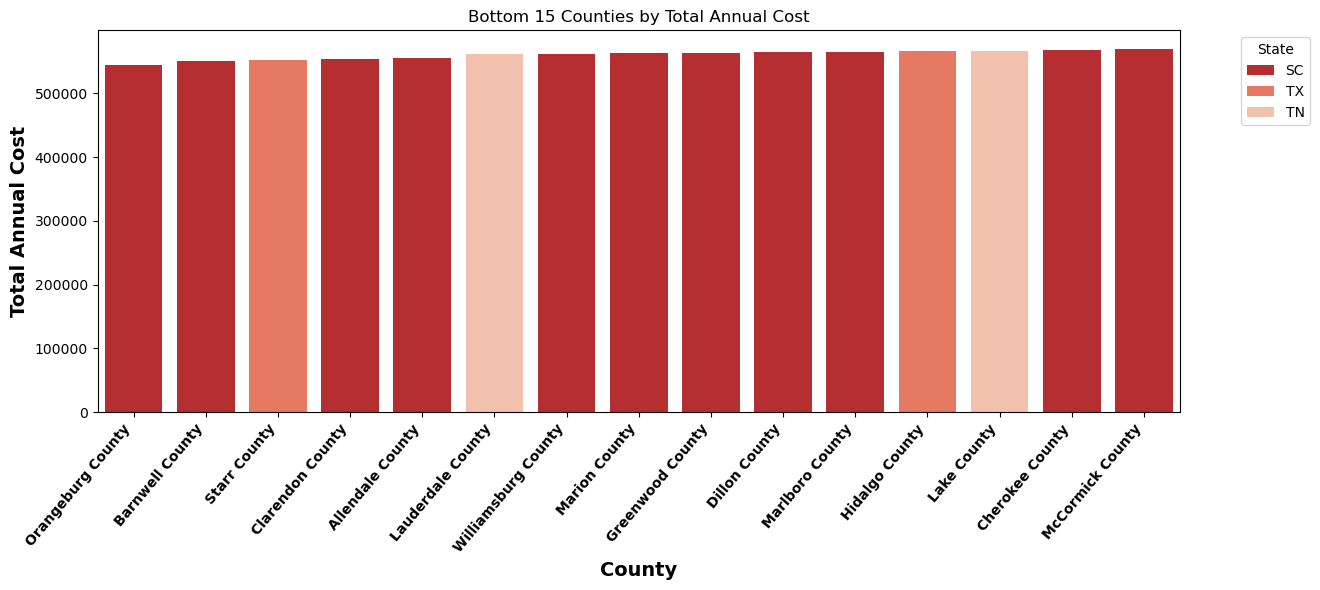

In [85]:
# Plotting bar graph to show bottom 15 counties in regard to total annual cost
plt.figure(figsize=(12, 6))
bar26 = sns.barplot(x="county", y="annual_total_cost", hue="state", data=bottom_15_counties, palette="Reds_r", dodge=False)
plt.title('Bottom 15 Counties by Total Annual Cost')
plt.xlabel('County',fontsize=14, fontweight = 'bold')
plt.ylabel('Total Annual Cost', fontsize=14, fontweight = 'bold')
plt.xticks(rotation=50, ha='right', fontsize=10, fontweight = 'bold') 
plt.tight_layout()  
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lowest total annual cost counties are in SC, TX, and TN.

In [86]:
# Export bar chart as image file
bar26.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/countytotalbar2.png', bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

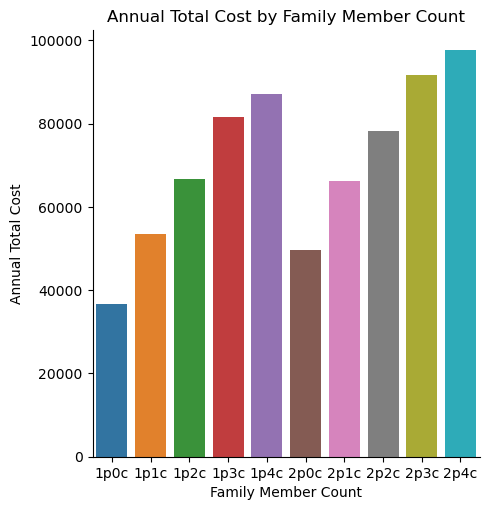

In [87]:
# Creating bar plot for family number count and annual total cost 
plt.figure(figsize=(10, 6))
bar27 = sns.catplot(x="family_member_count", y="annual_total_cost", data=df, kind="bar", errorbar=None)
plt.title('Annual Total Cost by Family Member Count')
plt.xlabel('Family Member Count')
plt.ylabel('Annual Total Cost')
plt.show()

A bigger family size corresponds to a higher total annual cost.

In [88]:
# Export bar chart as image file
bar27.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/familycounttotalbar.png', bbox_inches='tight')

Potential Hypotheses:
1) If the household has 2 parents, then the total cost of expenses will be greater than if the household has one parent.
2) If a household pays more for housing, then they will pay more for other expenses and thus have a higher total annual cost than someone who pays less for housing. ***
3) If a household has dependents, then they will have a higher total annual cost than a household with no dependents.
4) If a household has 3-4 dependents, then they will have a higher total annual cost than a household with no dependents. 
5) If a household has both parents, 4 dependents, and lives in New York/California, then they will have a higher total annual cost than any other household. 
6) If a household has one parent and no dependents, then they will have a lower total annual cost than any other household.
7) If a household has a high income, then the household will have lower healthcare costs than a household that is average or low income. 

# 07. Exporting Data Frame

In [89]:
# Exporting data frame as pickle to preserve format and data types 
df.to_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_graphs.pkl')